Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r'C:\Users\nasar\Downloads\creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

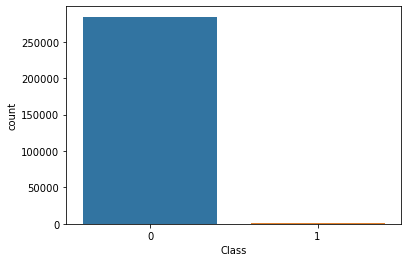

In [7]:
#create a bar plot of the counts of the two classes (fake and true) in the DataFrame
sns.countplot(x="Class", data=credit_card_data)
plt.show()

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
legit_sample.Amount.describe()

count     492.000000
mean       81.052215
std       155.433806
min         0.000000
25%         5.607500
50%        23.225000
75%        79.000000
max      1174.000000
Name: Amount, dtype: float64

Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26211,33954.0,1.206240,-0.579113,0.373402,0.463354,-0.484715,0.634940,-0.611566,0.101985,-0.608037,...,-0.375346,-0.545638,-0.131002,-0.948424,0.499900,-0.252088,0.077179,0.032639,70.30,0
202995,134597.0,2.045431,-1.194970,-0.343852,-0.983784,-1.140580,-0.131652,-1.237515,0.034252,0.132931,...,0.285326,0.645124,0.251911,0.524003,-0.475859,-0.308335,0.017033,-0.018921,71.81,0
161643,114385.0,2.199627,-0.865578,-3.544928,-2.004753,2.406745,2.699181,-0.325890,0.469619,-1.136019,...,0.364863,0.878824,-0.057001,0.768257,0.474943,0.097125,-0.065736,-0.081966,45.00,0
260887,159765.0,2.307204,-1.176483,-1.385350,-1.753203,-0.790520,-0.775408,-0.778943,-0.308233,-1.959416,...,0.117554,0.849080,0.011052,-0.352711,0.122410,0.073189,-0.008351,-0.072811,15.00,0
137385,82137.0,-1.124518,0.747870,0.010001,1.859574,2.506852,-1.977826,0.664423,-0.314253,-1.047447,...,-0.023278,-0.096839,-0.153137,0.087522,0.228304,-0.192827,-0.035942,-0.006497,1.00,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94877.711382,0.050570,-0.013175,-0.067062,-0.030698,0.006679,0.024769,-0.117467,0.066635,0.064014,...,-0.012390,-0.017193,-0.023693,-0.056836,-0.011807,0.007629,0.031198,0.031773,0.017189,81.052215
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
new_dataset = new_dataset.drop(columns=['Time'])

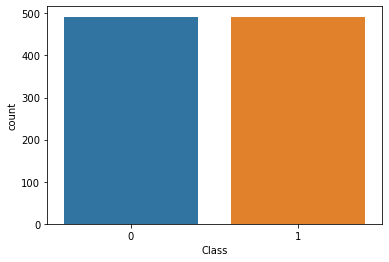

In [21]:
#create a bar plot of the counts of the two classes (fake and true) in the DataFrame
sns.countplot(x="Class", data=new_dataset)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

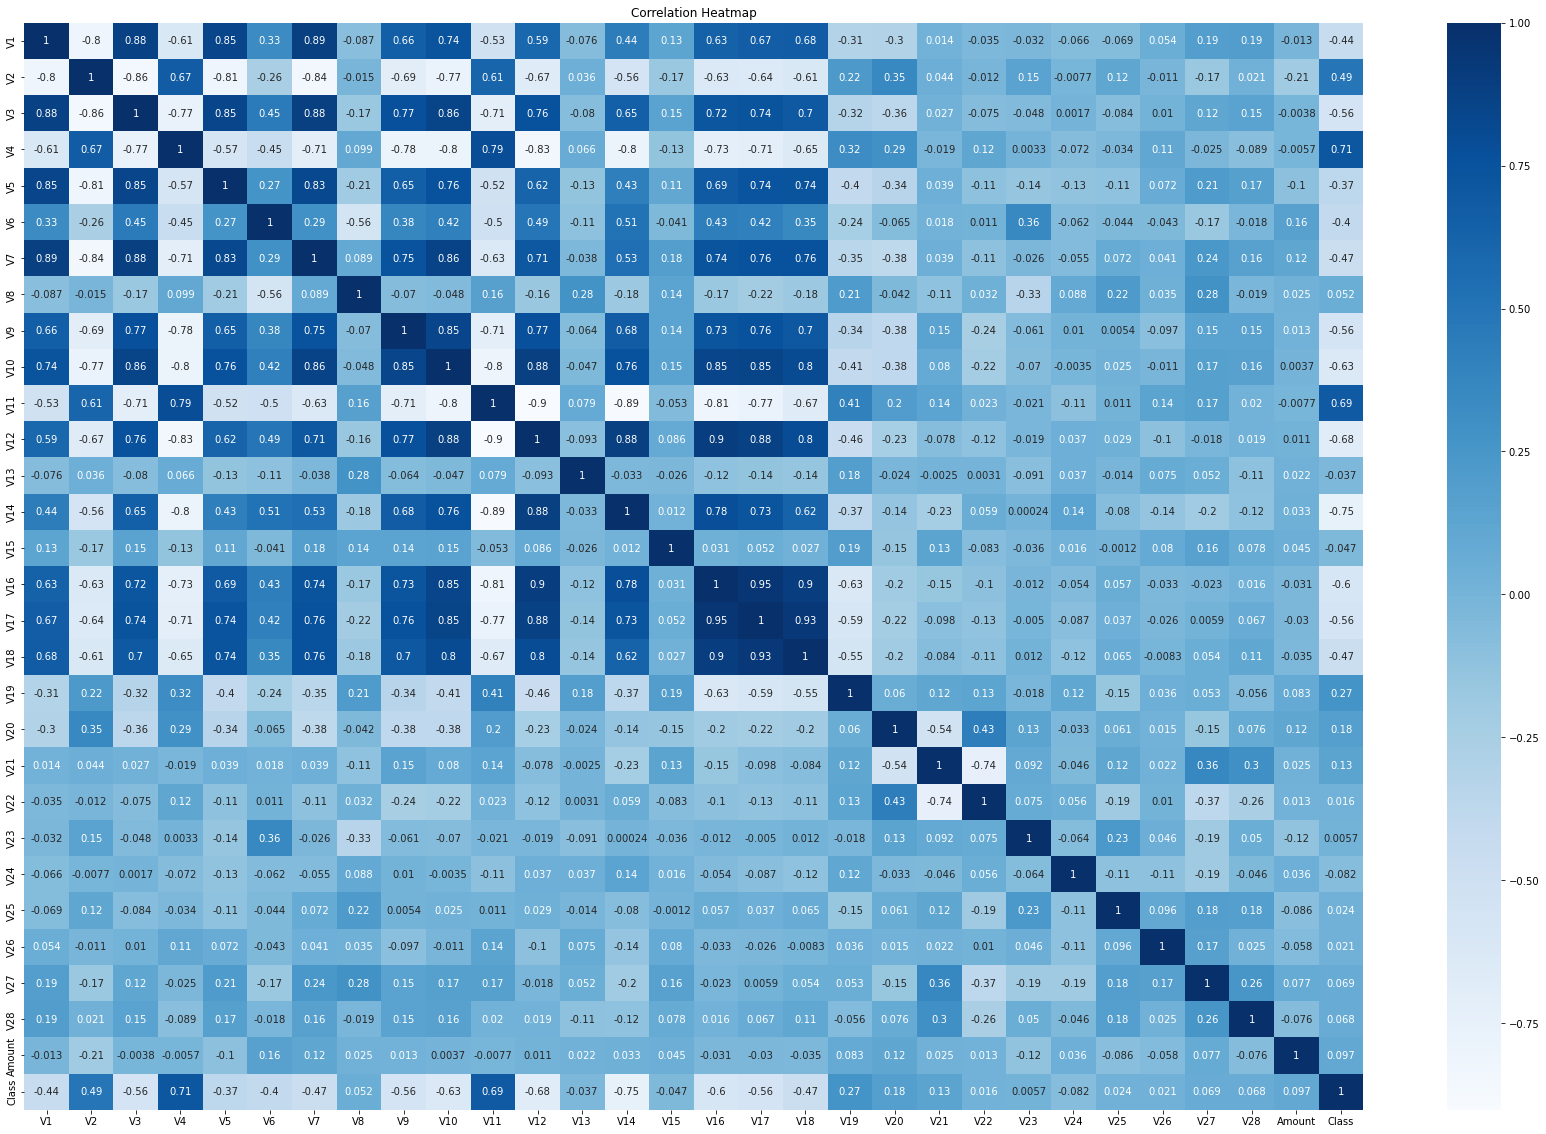

In [22]:
# Plot a correlation heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(new_dataset.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Legit Transactions - Amount Distribution')

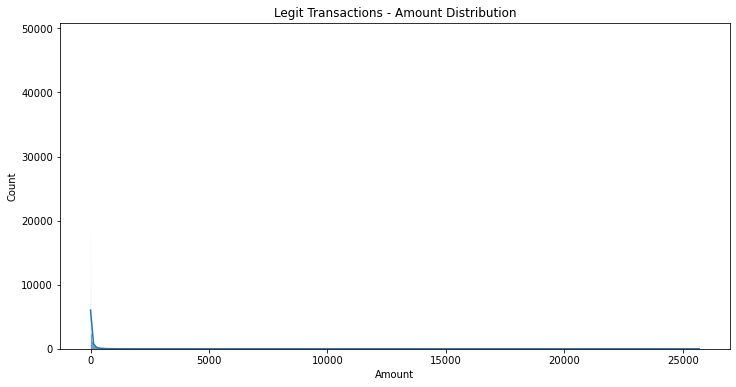

In [23]:
# Plot a histogram of the 'Amount' column for the legit class
plt.figure(figsize=(12, 6))
sns.histplot(data=legit, x='Amount', kde=True)
plt.title('Legit Transactions - Amount Distribution')

Text(0.5, 1.0, 'Fraud Transactions - Amount Distribution')

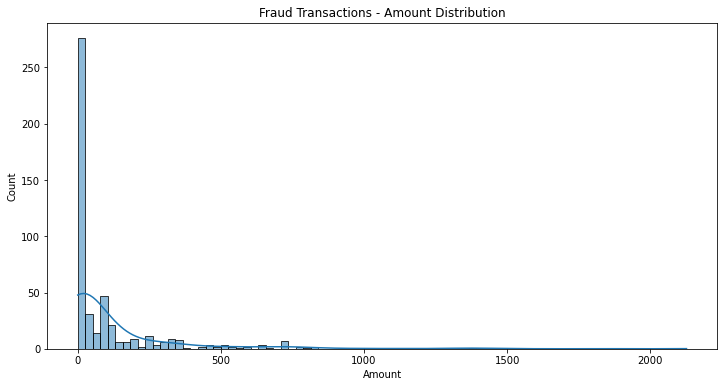

In [24]:
# Plot a histogram of the 'Amount' column for the fraud class
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud, x='Amount', kde=True)
plt.title('Fraud Transactions - Amount Distribution')

Splitting the data into Features & Targets

In [25]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [26]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
26211   1.206240 -0.579113  0.373402  0.463354 -0.484715  0.634940 -0.611566   
202995  2.045431 -1.194970 -0.343852 -0.983784 -1.140580 -0.131652 -1.237515   
161643  2.199627 -0.865578 -3.544928 -2.004753  2.406745  2.699181 -0.325890   
260887  2.307204 -1.176483 -1.385350 -1.753203 -0.790520 -0.775408 -0.778943   
137385 -1.124518  0.747870  0.010001  1.859574  2.506852 -1.977826  0.664423   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [27]:
print(Y)

26211     0
202995    0
161643    0
260887    0
137385    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


In [30]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

Model Training

In [31]:
# create the linear model SGDclassifier
from sklearn.linear_model import SGDClassifier
linear_clf = SGDClassifier()
linear_clf.fit(X_train2, Y_train)
# Evaluate the result
from sklearn import metrics
y_train_pred = linear_clf.predict(X_train2)
print ("\nThe Accuracy of our classifier is:", metrics.accuracy_score(Y_train, y_train_pred)*100)


The Accuracy of our classifier is: 90.08894536213468


In [32]:
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       393
           1       0.86      0.96      0.91       394

    accuracy                           0.90       787
   macro avg       0.91      0.90      0.90       787
weighted avg       0.91      0.90      0.90       787



In [33]:
model = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
# training the random forest with Training Data
model.fit(X_train2, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train2)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test2)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [34]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [ ]:
#Neural Network Classifier
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train2, Y_train)
y_pred = MLPC.predict(X_test2)
print ("\nThe Accuracy of our classifier is:", metrics.accuracy_score(Y_test, y_pred)*100)

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
# Create the model
rf = RandomForestClassifier()
# Define the hyperparameters to be tuned
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2']
}
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train2, Y_train)

# Get the best hyperparameters
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, confusion_matrix
ConfusionMatrixDisplay.from_predictions(Y_test, X_test_prediction)
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
# Add learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train2, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=1)
# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
conf_mat = confusion_matrix(Y_test, X_test_prediction)
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()